# TASK 2

# UNEMPLOYEMENT ANALYSIS WITH PYTHON

Unemployment is measured by the unemployment rate which is the number of people
who are unemployed as a percentage of the total labour force. We have seen a sharp
increase in the unemployment rate during Covid-19, so analyzing the unemployment rate
can be a good data science project.

1.Andhra pradesh , 2. Assam , 3. Bihar , 4. Chhattisgarh , 5. Delhi , 5. Goa 6.Gujrat , 8. Haryana , 9. Himachal Pradesh , 10. Jammu & Kashmir , 11.Jharkhand , 12. Karnataka , 13. Kerala 14. Madhya Pradesh , 15. Maharashtra , 16.Meghalaya , 17. Odisha , 18. Puducherry , 19. Punjab, 20. Rajasthan, 21.Sikkim , 22. Tamil Nadu , 23. Telangana , 24. Tripura , 25. Uttar Pradesh, 26.Uttarakhand , 27. West Bengal

# importing libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# data load

In [2]:
df=df=pd.read_csv(r"C:\Users\Maruthipadala\Downloads\archive (12)\Unemployment in India.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


# Data Processing


# data cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [4]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [5]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [6]:
#check the null values
df.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [7]:
#drop the rows with missing values
df=df.dropna()

In [8]:
#check the missing values
df.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
749    False
750    False
751    False
752    False
753    False
Length: 740, dtype: bool

In [10]:
df = df.fillna(df.mean()) # Fill missing values with the mean

In [11]:
df.shape

(740, 7)

In [12]:
#df.dtypes

In [13]:
df.rename(columns={'Region': 'State'}, inplace=True) # Renaming the 'Region' Column to 'State' Column

In [14]:
df = df.drop_duplicates([' Date', 'State'])  # Remove Duplicate Entries

In [15]:
# Calculate average unemployment rate by state
average_unemployment_rate = df.groupby('State')[' Estimated Unemployment Rate (%)'].mean()
average_unemployment_rate

State
Andhra Pradesh       5.526429
Assam                4.805714
Bihar               16.770000
Chandigarh          15.991667
Chhattisgarh         6.628571
Delhi               15.258571
Goa                  8.110769
Gujarat              5.917143
Haryana             25.012857
Himachal Pradesh    15.504286
Jammu & Kashmir     14.290833
Jharkhand           15.221429
Karnataka            7.224286
Kerala              10.341429
Madhya Pradesh       5.653571
Maharashtra          6.810000
Meghalaya            2.475000
Odisha               6.612857
Puducherry          11.907857
Punjab              11.925000
Rajasthan           10.927143
Sikkim               7.812500
Tamil Nadu           8.775714
Telangana            7.863571
Tripura             27.166429
Uttar Pradesh       10.208571
Uttarakhand          5.115714
West Bengal          7.572143
Name:  Estimated Unemployment Rate (%), dtype: float64

# state with highest unemployee rate

In [16]:
# Find the state with the highest unemployment rate
state_with_highest_unemployment = average_unemployment_rate.idxmax()
highest_unemployment_rate = average_unemployment_rate.max()

print("State with the highest unemployment rate:", state_with_highest_unemployment)
print("Highest unemployment rate:", highest_unemployment_rate)

State with the highest unemployment rate: Tripura
Highest unemployment rate: 27.166428571428572


# State with lowest unemployment rate

In [17]:
# Find the state with the lowest unemployment rate
state_with_lowest_unemployment = average_unemployment_rate.idxmin()
lowest_unemployment_rate = average_unemployment_rate.min()

print("State with the lowest unemployment rate:", state_with_lowest_unemployment)
print("Lowest unemployment rate:", lowest_unemployment_rate)

State with the lowest unemployment rate: Meghalaya
Lowest unemployment rate: 2.4750000000000005


In [18]:
df.columns


Index(['State', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

# Data Visualization:

#a. Line plot showing unemployment rate over time:

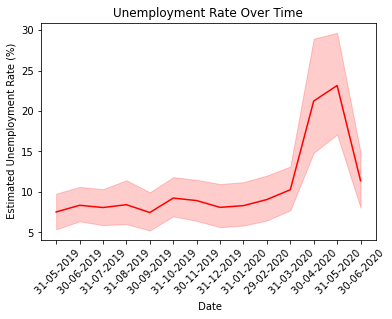

In [19]:
sns.lineplot(x=' Date', y=' Estimated Unemployment Rate (%)', data=df,color='red')
plt.xticks(rotation=45)
plt.title('Unemployment Rate Over Time')
plt.show()

b. Scatter plot showing the relationship between unemployment rate and labor participation rate:

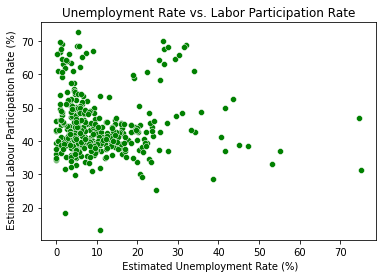

In [20]:
sns.scatterplot(x=' Estimated Unemployment Rate (%)', y=' Estimated Labour Participation Rate (%)', data=df,color='green')
plt.title('Unemployment Rate vs. Labor Participation Rate')
plt.show()

c.Bar plot displaying average unemployment rate by state:

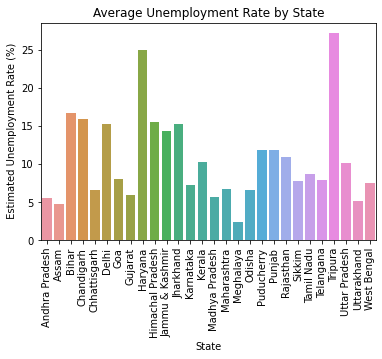

In [21]:
state_avg_unemployment = df.groupby('State')[' Estimated Unemployment Rate (%)'].mean().reset_index()
sns.barplot(x='State', y=' Estimated Unemployment Rate (%)', data=state_avg_unemployment)
plt.xticks(rotation=90)
plt.title('Average Unemployment Rate by State')
plt.show()

d. Histogram of Unemployment Rate Distribution:

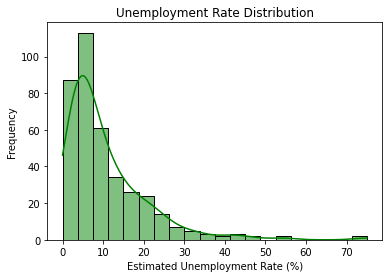

In [22]:
sns.histplot(df[' Estimated Unemployment Rate (%)'], bins=20, kde=True,color='green')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.title('Unemployment Rate Distribution')
plt.show()

e. Area Plot of Labor Participation Rate Over Time by State :

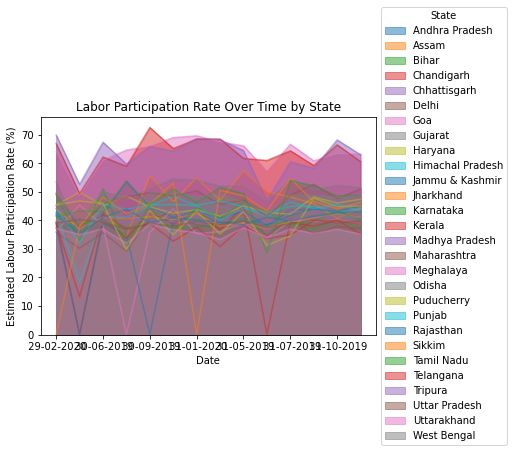

In [23]:
state_area_labor_participation = df.pivot(index=' Date', columns='State', values=' Estimated Labour Participation Rate (%)')
state_area_labor_participation.plot(kind='area', stacked=False, alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.title('Labor Participation Rate Over Time by State')
plt.legend(title='State', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

f. Boxplot of Unemployment Rate by State:

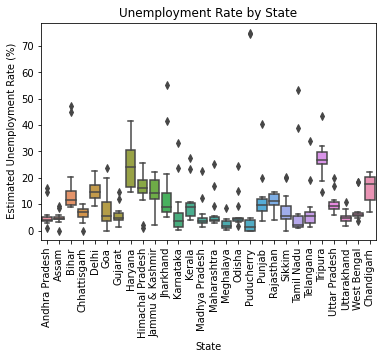

In [24]:
sns.boxplot(x='State', y=' Estimated Unemployment Rate (%)', data=df)
plt.xticks(rotation=90)
plt.title('Unemployment Rate by State')
plt.show()

g. Heatmap of Correlation Matrix:

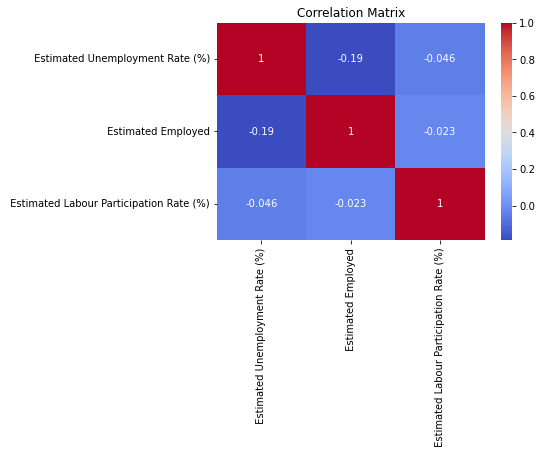

In [25]:
correlation_matrix = df[[' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

h. Stacked Bar Plot of Unemployment Rate by Frequency and State:

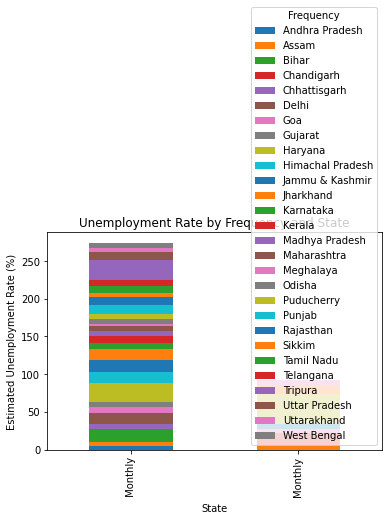

In [26]:
freq_state_unemployment = df.groupby([' Frequency', 'State'])[' Estimated Unemployment Rate (%)'].mean().unstack()
freq_state_unemployment.plot(kind='bar', stacked=True)
plt.xlabel('State')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate by Frequency and State')
plt.legend(title='Frequency')
plt.show()
     